### Christopher Ayre
### DATA 620

#### WEEK 10/11 - Document Classification

__ASSIGNMENT__

It can be useful to be able to classify new "test" documents using already classified "training" documents. A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam. Here is one example of such data: http://archive.ics.uci.edu/ml/datasets/Spambase

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified.

### THE DATA - spambase.data

http://archive.ics.uci.edu/ml/datasets/Spambase
### A collection of emails from UCI's machine learning repository

In [12]:
# LIBRARY IMPORTS

import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import seaborn as sn
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr



In [19]:
# DATA IMPORT
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report','word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq0', 'char_freq1', 'char_freq2', 'char_freq3', 'char_freq4', 'char_freq5', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'classified']
data = pd.read_csv('spambase.data', names=cols, header=None)

X = data.iloc[:, :-1]
y = data.classified

In [20]:
# Identify the number of spam and non-spam emails within the dataset
spamcount = len(data[data.classified==1])
nonspamcount = len(data[data.classified==0])

print ("Spam: %d" %spamcount)
print ("Non-spam: %d" %nonspamcount)

Spam: 1813
Non-spam: 2788


In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

###  Using MultinomialNB Classifier to make prediction and scoring our accuracy

In [28]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

predicted = mnb.predict(X_test)

score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 81.21606948968513


### Our Model has scored 81% accuracy for being able to predict Spam emails.


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       538
           1       0.78      0.77      0.77       383

    accuracy                           0.81       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.81      0.81      0.81       921



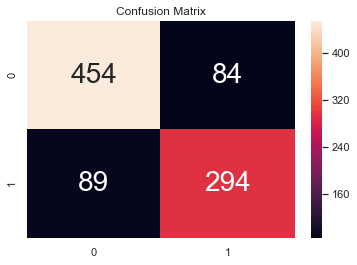

In [32]:
# Creating a confusion matrix and Classification Report. Output is in order of: True Positive, False Positive, False Negative and True Negative

cm1 = cm(y_test, predicted, labels=[0, 1])
df_cm = pd.DataFrame(cm1, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':28}, fmt='d').set_title('Confusion Matrix')

print('\nClassification Report: \n', cr(y_test, predicted))

### Of the 921 test emails 454 were correctly identified as Non-SPAM
### Of the 921 test emails 294 were correctly identified as SPAM
### Of the 921 test emails 84 were incorrectly identified as Non-SPAM
### Of the 921 test emails 89 were incorrectly identified as SPAM